#### AFML - Mat-Eig Test on Sample curves

In [1]:
import numpy as np
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt
 
def average_angle(array):
    # for each triplet of consecutive points, compute the angle
    angles = []
    for i in range(len(array)-2):
        p1 = array[i,:]
        p2 = array[i+1,:]
        p3 = array[i+2,:]
        v1 = p2 - p1
        v2 = p3 - p2
        angle = np.arccos(np.dot(v1,v2)/(np.linalg.norm(v1)*np.linalg.norm(v2)))
        angles.append(angle)
    return angles



def distances(array):
    dist_matrix = distance_matrix(array, array)
    # get part above diagonal
    distances = dist_matrix[np.triu_indices(len(array), k=1)]
    return distances
 

def eigendecomposition(array):
    dist_matrix = distance_matrix(array, array)
    sigma = 0.3
    closeness_matrix = np.exp(-dist_matrix**2/(2*sigma**2))
    # compute the degree matrix
    degree_matrix = np.diag(np.sum(closeness_matrix, axis=1))
    # compute the laplacian matrix
    laplacian_matrix = degree_matrix - closeness_matrix
    # compute the eigendecomposition
    eigenvalues, eigenvectors = np.linalg.eig(laplacian_matrix)
    # sort the eigenvalues and eigenvectors to start with highest eigenvalue
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:,idx]
    return eigenvalues, eigenvectors


In [49]:
x_grid = np.linspace(-2,2,100)

fn1 = lambda x : x ** 3
fn1_grid = fn1(x_grid)

fn2 = lambda x : x ** 2
fn2_grid = fn2(x_grid)

fn3 = lambda x, freq : np.sin(freq * x)
fn3_grid = fn3(x_grid, 3)

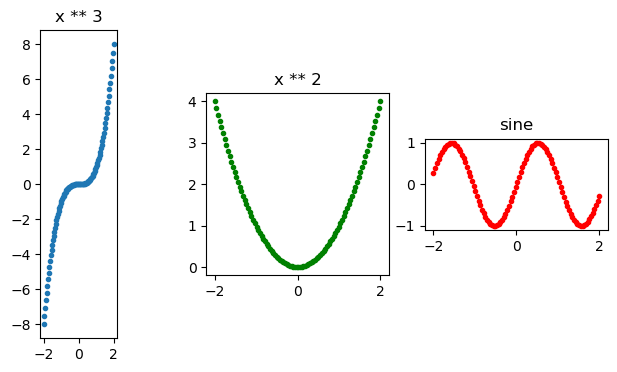

In [50]:
# Plotting both point clouds
fig, ax = plt.subplots(1, 3, figsize=(8, 4))

# Plot square
ax[0].scatter(x_grid, fn1_grid, marker='.')
ax[0].set_title("x ** 3")
ax[0].set_aspect('equal', adjustable='box')

# Plot circle
ax[1].scatter(x_grid, fn2_grid, marker='.', c='green')
ax[1].set_title("x ** 2")
ax[1].set_aspect('equal', adjustable='box')

ax[2].scatter(x_grid, fn3_grid, marker='.', c='red')
ax[2].set_title("sine")
ax[2].set_aspect('equal', adjustable='box')

Text(0, 0.5, 'angle between triplets of consec points')

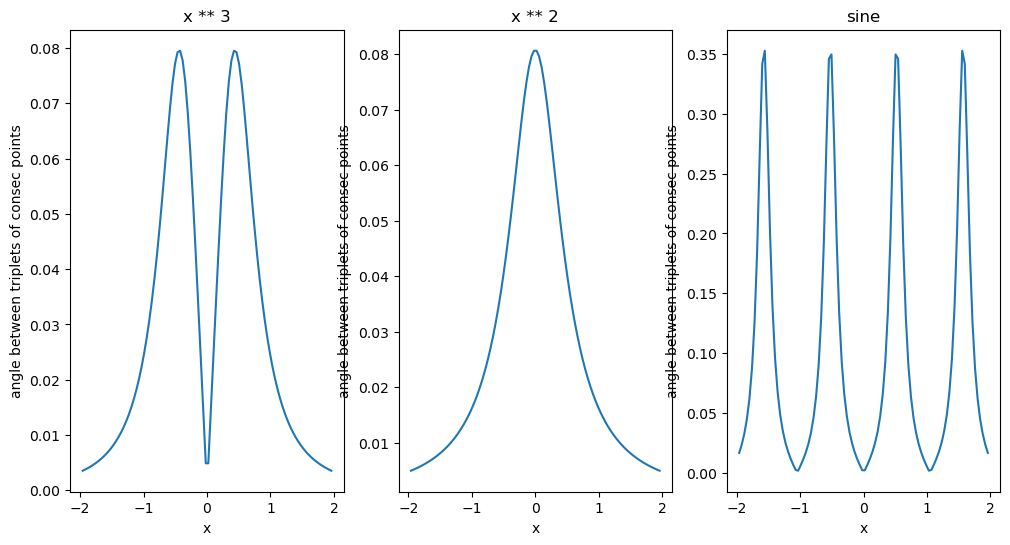

In [51]:
fn1_2d_grid = np.array([x_grid, fn1_grid]).transpose()
fn2_2d_grid = np.array([x_grid, fn2_grid]).transpose()
fn3_2d_grid = np.array([x_grid, fn3_grid]).transpose()

angles_fn1 = average_angle(fn1_2d_grid)
angles_fn2 = average_angle(fn2_2d_grid)
angles_fn3 = average_angle(fn3_2d_grid)

# Plotting both point clouds
fig, ax = plt.subplots(1,3, figsize=(12,6))

# Plot square
ax[0].plot(x_grid[1:-1], angles_fn1)
ax[0].set_title("x ** 3")
ax[0].set_xlabel("x")
ax[0].set_ylabel("angle between triplets of consec points")
#ax[0].set_aspect('equal', adjustable='box')

# Plot circle
ax[1].plot(x_grid[1:-1], angles_fn2)
ax[1].set_title("x ** 2")
ax[1].set_xlabel("x")
ax[1].set_ylabel("angle between triplets of consec points")
#ax[1].set_aspect('equal', adjustable='box')

ax[2].plot(x_grid[1:-1], angles_fn3)
ax[2].set_title("sine")
ax[2].set_xlabel("x")
ax[2].set_ylabel("angle between triplets of consec points")
#ax[1].set_aspect('equal', adjustable='box')





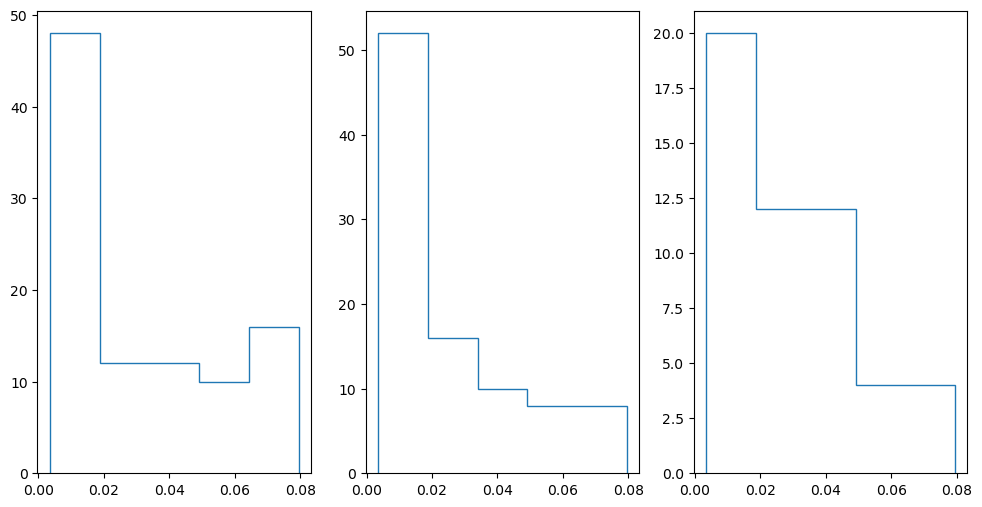

In [53]:
frequencies_fn1, bins = np.histogram(angles_fn1, bins=5)
frequencies_fn2, bins = np.histogram(angles_fn2, bins=bins)
frequencies_fn3, bins = np.histogram(angles_fn3, bins=bins)

fig, ax = plt.subplots(1,3, figsize=(12,6))

ax[0].stairs(frequencies_fn1, bins)
ax[1].stairs(frequencies_fn2, bins)
ax[2].stairs(frequencies_fn3, bins)


In [58]:
def kl(p, q):

    p = np.asarray(p, dtype=np.float)
    p = p/sum(p)

    q = np.asarray(q, dtype=np.float)
    q = q/sum(q)

    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

def binary_cross_entropy(t,p):
    t = np.float_(t)
    t = t/sum(t)

    p = np.float_(p)
    p = p/sum(p)
    # binary cross-entropy loss
    return -np.sum(t * np.log(p) + (1 - t) * np.log(1 - p))

In [60]:
print("fn2 w//r/t fn1")
fn12 = kl(frequencies_fn2, frequencies_fn1)
print(fn12)

print("fn3 w/r/t fn1")
fn13 = kl(frequencies_fn3, frequencies_fn1)
print(fn13)

print("fn3 w/r/t fn2")
fn32 = kl(frequencies_fn3, frequencies_fn2)
print(fn32)

fn2 w//r/t fn1
0.03754070209545748
fn3 w/r/t fn1
0.1198830847227181
fn3 w/r/t fn2
0.09359466882468805


/var/folders/rx/dldq1t594tq9sc8pq_4csvtc0000gp/T/ipykernel_2817/2895137226.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  p = np.asarray(p, dtype=np.float)
/var/folders/rx/dldq1t594tq9sc8pq_4csvtc0000gp/T/ipykernel_2817/2895137226.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  q = np.asarray(q, dtype=np.float)


In [61]:
print("fn2 w//r/t fn1")
ce12 = binary_cross_entropy(frequencies_fn2, frequencies_fn1)
print(ce12)

print("fn3 w//r/t fn1")
ce13 = binary_cross_entropy(frequencies_fn3, frequencies_fn1)
print(ce13)

print("fn3 w//r/t fn2")
ce32 = binary_cross_entropy(frequencies_fn3, frequencies_fn2)
print(ce32)

fn2 w//r/t fn1
2.1115452070287017
fn3 w//r/t fn1
2.4377280488985424
fn3 w//r/t fn2
2.422506877992445
